In [1]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

In [2]:
# 创建一个 DataFrame 对象的数据
foods_df = pd.DataFrame({'食品名': ['肚脐饼', '水晶饺', '擂茶', '肚脐饼', '擂茶'], '单价': [2, 10, 12, 4, 20], '数量': [20, '-', 35, 37, '-'], '城市': ['潮州', '汕尾', '梅州', '深圳', '深圳']})
foods_df

,食品名,单价,数量,城市
0,肚脐饼,2,20,潮州
1,水晶饺,10,-,汕尾
2,擂茶,12,35,梅州
3,肚脐饼,4,37,深圳
4,擂茶,20,-,深圳


In [3]:
# 定义函数，以替换【数量】列的“-”为 0
def checkCount(data):
    if data == "-":
        return 0
    else:
        return data
    
    
# 使用 agg() 方法对【数量】列的内容进行替换
foods_df['数量'] = foods_df['数量'].agg(checkCount)
# 同时计算【单价】列的最小值和【数量】列的最大值
foods_df.groupby('食品名').agg({'单价': 'min', '数量': 'max'})

,单价,数量
食品名,,
擂茶,12,35
水晶饺,10,0
肚脐饼,2,37


In [4]:
# 创建4条快餐交易数据
orders = [['薯条', '可乐'], ['薯条', '可乐', '奶茶'], ['汉堡', '薯条', '可乐'], ['汉堡', '可乐']]
# 创建变量 results，调用 apriori() 函数，传入 orders ，设置最小支持度为 0.2，最小置信度为 0.7
results = apriori(orders, min_support=0.2, min_confidence=0.7)
# 查看变量 results
results

<generator object apriori at 0x000001E81888D070>

In [5]:
# 创建4条早餐店交易数据
breakfast = [['豆浆', '油条', '麻球'], ['豆浆', '热干面', '面包'], ['豆浆', '肠粉', '油条'], ['咖啡', '面包'], ['豆浆', '油条']]
# 调用 apriori() 函数
results_bre = apriori(breakfast, min_support=0.5)
# 遍历结果数据
for result in results_bre:
    # 获取支持度,并保留3位小数
    support = round(result.support, 3)
    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)
        # 跳过前件为空的数据
        if head_set == []:
                continue
        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set) + '→' + str(tail_set)
        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留3位小数
        lift = round(rule.lift, 3)
        # 查看强关联规则，支持度，置信度，提升度
        print(related_catogory, support, confidence, lift)

['油条']→['豆浆'] 0.6 1.0 1.25
['豆浆']→['油条'] 0.6 0.75 1.25


In [6]:
user_data = pd.read_csv('./课程素材/公众号用户访问数据.csv', encoding='utf-8')
user_data

,用户编号,文章类别,阅读数,看一看,点赞,赞赏,被转载,访问日期
0,1,数据分析,20051,1203,2406,80,601,2020/9/21
1,2,数据分析,11690,584,1519,46,233,2020/9/17
2,3,数据分析,5720,400,572,45,228,2020/9/2
3,4,数据分析,22502,1125,3150,45,900,2020/9/24
4,5,数据分析,11201,560,1344,89,448,2020/9/8
...,...,...,...,...,...,...,...,...
194,98,pandas,7454,521,819,29,223,2020/9/20
195,98,pandas,7587,379,910,22,151,2020/9/20
196,99,数据分析,12179,852,1217,48,487,2020/9/23
197,99,pandas,11715,585,1288,46,351,2020/9/23


In [7]:
# 提取列数据（'用户编号', '文章类别', '访问日期'），并进行赋值
analysis_data = user_data[['用户编号', '文章类别', '访问日期']]
# 查看提取的数据
analysis_data

,用户编号,文章类别,访问日期
0,1,数据分析,2020/9/21
1,2,数据分析,2020/9/17
2,3,数据分析,2020/9/2
3,4,数据分析,2020/9/24
4,5,数据分析,2020/9/8
...,...,...,...
194,98,pandas,2020/9/20
195,98,pandas,2020/9/20
196,99,数据分析,2020/9/23
197,99,pandas,2020/9/23


In [8]:
# 查看提取数据后的重复数据
analysis_data[analysis_data.duplicated()]
# 去除重复数据
analysis_data = analysis_data.drop_duplicates()

In [9]:
# 定义函数，将数据类型转换成列表
def conversion_data(category):

    # 判断文章类别是否已经转成了列表格式
    if str(category)[0] == '[':
        # 直接返回文章类别
        return category
    # 返回转成列表格式后的文章类别
    return [category]


# 获取'文章类别'列，调用 agg() 方法
analysis_data['文章类别'] = analysis_data['文章类别'].agg(conversion_data)
# 查看处理后的数据
analysis_data

C:\Users\liuch\AppData\Local\Temp\ipykernel_13968\1446680533.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['文章类别'] = analysis_data['文章类别'].agg(conversion_data)


,用户编号,文章类别,访问日期
0,1,[数据分析],2020/9/21
1,2,[数据分析],2020/9/17
2,3,[数据分析],2020/9/2
3,4,[数据分析],2020/9/24
4,5,[数据分析],2020/9/8
...,...,...,...
193,98,[数据分析],2020/9/20
194,98,[pandas],2020/9/20
196,99,[数据分析],2020/9/23
197,99,[pandas],2020/9/23


In [10]:
# 根据'访问日期'和'用户编号'进行分组，并聚合'文章类别'列
adjusted_data = analysis_data.groupby(['访问日期', '用户编号']).sum()
# 查看整理后的数据
analysis_data.describe()

,用户编号
count,192.00000
mean,58.93750
std,26.37757
min,1.00000
25%,39.00000
50%,63.00000
75%,80.00000
max,99.00000


In [11]:

# 提取'文章类别'列数据，调用 apriori() 函数，设置最小支持度为 0.1 ，使用默认最小置信度
results = apriori(adjusted_data['文章类别'], min_support=0.1)

# 遍历结果数据
for result in results:
    # 获取支持度,并保留 3 位小数
    support = round(result.support, 3)

    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
                continue

        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set) + '→' + str(tail_set)

        # 提取置信度，并保留 3 位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留 3 位小数
        lift = round(rule.lift, 3)

        # 查看强关联规则，支持度，置信度，提升度
        print(related_catogory, support, confidence, lift)

['Python']→['sql'] 0.101 0.233 2.302
['sql']→['Python'] 0.101 1.0 2.302
['Python']→['数据分析'] 0.323 0.744 0.91
['数据分析']→['Python'] 0.323 0.395 0.91
['Python']→['爬虫'] 0.141 0.326 1.04
['爬虫']→['Python'] 0.141 0.452 1.04
['pandas']→['数据分析'] 0.182 1.0 1.222
['数据分析']→['pandas'] 0.182 0.222 1.222
['数据分析']→['爬虫'] 0.192 0.235 0.749
['爬虫']→['数据分析'] 0.192 0.613 0.749


In [12]:
# 提取'文章类别'列数据，调用 apriori() 函数，设置最小支持度为 0.1 ，设置最小置信度 0.3
results = apriori(adjusted_data['文章类别'], min_support=0.1, min_confidence=0.3)

# 创建空列表，存储关联规则列表，形成嵌套列表
extract_result = []

for result in results:
    # 获取支持度,并保留 3 位小数
    support = round(result.support, 3)

    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
                continue

        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set) + '→' + str(tail_set)

        # 提取置信度，并保留 3 位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留 3 位小数
        lift = round(rule.lift, 3)

        # 将提取的数据保存到提取列表中
        extract_result.append([related_catogory, support, confidence, lift])

# 将数据转成 DataFrame 的形式
rules_data = pd.DataFrame(extract_result, columns=['关联规则', '支持度', '置信度', '提升度'])

# 将数据按照“支持度”排序
sorted_by_support = rules_data.sort_values(by='支持度')

# 查看排序后的数据
sorted_by_support


,关联规则,支持度,置信度,提升度
0,['sql']→['Python'],0.101,1.000,2.302
3,['Python']→['爬虫'],0.141,0.326,1.040
4,['爬虫']→['Python'],0.141,0.452,1.040
5,['pandas']→['数据分析'],0.182,1.000,1.222
6,['爬虫']→['数据分析'],0.192,0.613,0.749
1,['Python']→['数据分析'],0.323,0.744,0.910
2,['数据分析']→['Python'],0.323,0.395,0.910


In [13]:
# 提取出提升度大于 1 的数据，并重置数据的索引
promoted_rules = sorted_by_support[sorted_by_support['提升度'] > 1].reset_index(drop=True)
promoted_rules

,关联规则,支持度,置信度,提升度
0,['sql']→['Python'],0.101,1.000,2.302
1,['Python']→['爬虫'],0.141,0.326,1.040
2,['爬虫']→['Python'],0.141,0.452,1.040
3,['pandas']→['数据分析'],0.182,1.000,1.222


In [14]:
# 提取出提升度小于 1 的数据，并重置数据的索引
restricted_rules = sorted_by_support[sorted_by_support['提升度'] < 1].reset_index(drop=True)
restricted_rules

,关联规则,支持度,置信度,提升度
0,['爬虫']→['数据分析'],0.192,0.613,0.749
1,['Python']→['数据分析'],0.323,0.744,0.910
2,['数据分析']→['Python'],0.323,0.395,0.910


Text(0, 0.5, '数值')

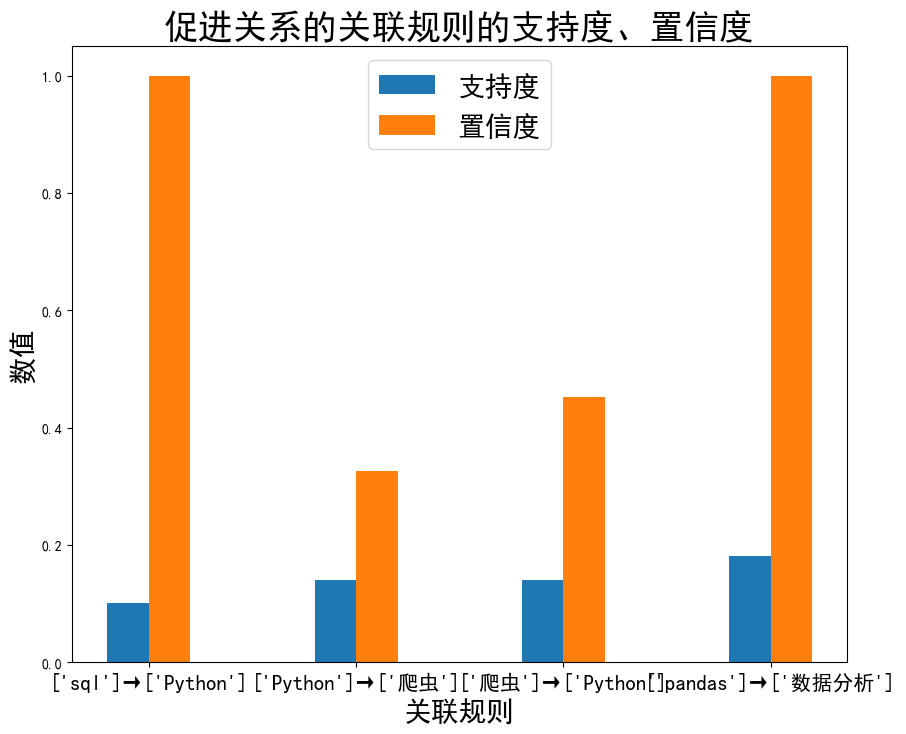

In [15]:
# 设置画布尺寸
plt.figure(figsize=(10, 8))

# 设置横纵坐标以及柱子的宽度
width = 0.2
plt.rcParams['font.family'] = ['SimHei']
# 画出柱状图
plt.bar(promoted_rules.index-width/2, promoted_rules['支持度'], width=width)
plt.bar(promoted_rules.index+width/2, promoted_rules['置信度'], width=width)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=20)
# 设置标题
plt.title('促进关系的关联规则的支持度、置信度', fontsize=25)
# 设置刻度名称
plt.xticks(promoted_rules.index, promoted_rules['关联规则'], fontsize=15)
# 设置坐标轴标签
plt.xlabel('关联规则', fontsize=20)
plt.ylabel('数值', fontsize=20)

In [16]:
# 导入 apyori 模块下的 apriori() 函数和 pandas 库
from apyori import apriori
import pandas as pd

# 张三快餐店的部分销售数据，为了方便，这里直接将“购买的餐品”创建成列表形式。
data_1 = pd.DataFrame({'订单号': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
                    '购买的餐品': [['炒河粉', '可乐'], ['一碗香', '龙骨汤'], ['炒河粉', '鸡腿', '可乐'], ['炒河粉', '龙骨汤'], ['一碗香', '可乐'],
                                ['炒河粉', '可乐'], ['炒河粉', '麻辣牛肉', '可乐'], ['炒河粉', '青菜', '可乐'], ['一碗香', '青菜', '龙骨汤'], ['炒河粉']]})

# 创建变量 results，调用 apriori() 函数并赋值给 results，将最小支持度设置为 0.15，最小置信度为 0.1
results = apriori(data_1['购买的餐品'], min_support=0.15, min_confidence=0.1)

# 创建提取列表
extract_result = []

# 遍历结果数据
for result in results:
    # 获取支持度，并保留 3 位小数
    support = round(result.support, 3)

    # 遍历 ordered_statistics 对象
    for rule in result.ordered_statistics: 

        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
            continue

        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set)+'→'+str(tail_set)

        # 提取提升度，并保留 3 位小数
        lift = round(rule.lift, 3)
        
        # 提取置信度，并保留 3 位小数
        confidence = round(rule.confidence, 3)
       
        # 将提取的数据保存到提取列表中
        extract_result.append([related_catogory, support, confidence, lift])

# 将数据转成 DataFrame 的形式
rules_data = pd.DataFrame(extract_result, columns=[
                        '关联规则', '支持度', '置信度', '提升度'])

# 查看数据
rules_data

,关联规则,支持度,置信度,提升度
0,['一碗香']→['龙骨汤'],0.2,0.667,2.222
1,['龙骨汤']→['一碗香'],0.2,0.667,2.222
2,['可乐']→['炒河粉'],0.5,0.833,1.190
3,['炒河粉']→['可乐'],0.5,0.714,1.190
